In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
pd.options.display.float_format = '{:.1f}'.format

In [3]:
youtube1 = pd.read_csv('[TEST] - 1day 애플.csv')
youtube2 = pd.read_csv('[TEST] - 7day 애플.csv')
youtube3 = pd.read_csv('[TEST] - 1month 애플.csv')
youtube4 = pd.read_csv('[TEST] - 3month 애플.csv')

In [4]:
#데이터 분포 확인
#youtube1.profile_report()
#youtube2.profile_report()
#youtube3.profile_report()

#1 하루 단위 데이터 전처리 과정 + 분석

In [5]:
youtube1.head()

,Stock,Date,Avg View,Avg Like,Avg Dislike,Avg Comment,Video Count,Price Change,Avg Volume,Avg Volume ratio
0,애플,44044,123407.0,6002.0,112.0,553.0,3.0,0.7,77037847.0,17.7
1,애플,44045,56065.0,4038.0,32.0,287.0,1.0,0.7,77037847.0,0.0
2,애플,44046,114327.0,2889.0,60.0,199.0,2.0,0.7,77037847.0,0.0
3,애플,44047,25163.0,1144.0,18.0,43.0,1.0,0.5,43198092.0,43.9
4,애플,44050,10841.0,97.0,1.0,5.0,1.0,1.9,49511403.0,2.2


In [6]:
#결측값 제거 또는 채워넣기 
for i in range(len(youtube1)):
    #Stock 값이 nan인 경우(빈 행인 경우)
    if(youtube1['Stock'][i] != youtube1['Stock'][i]):
        youtube1.drop(index=i, axis=0,inplace = True)
        continue 
    if(youtube1['Avg View'][i]== 0):
        youtube1.drop(index=i, axis=0,inplace = True) 
    if(youtube1['Price Change'][i]=='#N/A'):
        youtube1.drop(index=i, axis=0,inplace = True)
    if(youtube1['Avg Volume'][i]=='#N/A'):
        youtube1.drop(index=i, axis=0,inplace = True)
    if(youtube1['Avg Volume ratio'][i]=='#N/A'):
        youtube1.drop(index=i, axis=0,inplace = True)

In [7]:
youtube1.head()

,Stock,Date,Avg View,Avg Like,Avg Dislike,Avg Comment,Video Count,Price Change,Avg Volume,Avg Volume ratio
0,애플,44044,123407.0,6002.0,112.0,553.0,3.0,0.7,77037847.0,17.7
1,애플,44045,56065.0,4038.0,32.0,287.0,1.0,0.7,77037847.0,0.0
2,애플,44046,114327.0,2889.0,60.0,199.0,2.0,0.7,77037847.0,0.0
3,애플,44047,25163.0,1144.0,18.0,43.0,1.0,0.5,43198092.0,43.9
4,애플,44050,10841.0,97.0,1.0,5.0,1.0,1.9,49511403.0,2.2


#2 1주 단위 데이터 전처리 과정 + 분석

In [8]:
youtube2.head()

,Stock,Date,Avg View,Avg Like,Avg Dislike,Avg Comment,Video Count,Price Change,Avg Volume,Avg Volume ratio
0,애플,2020-08-01 - 2020-08-07,65960.6,2834.0,44.6,217.4,8,1.7,50244642.3,91.3
1,애플,2020-08-08 - 2020-08-14,70781.7,3468.0,58.0,268.3,3,0.4,47187551.7,6.1
2,애플,2020-08-15 - 2020-08-21,47971.0,1230.8,30.2,152.2,6,0.3,30894416.0,34.5
3,애플,2020-08-22 - 2020-08-28,95569.8,3167.0,50.2,238.5,8,1.7,60037985.3,94.3
4,애플,2020-08-29 - 2020-09-04,53775.8,1670.8,42.8,179.5,8,3.0,192763940.3,221.1


In [9]:
#결측값 제거 또는 채워넣기 
for i in range(len(youtube2)):
    #Stock 값이 nan인 경우(빈 행인 경우)
    if(youtube2['Stock'][i] != youtube2['Stock'][i]):
        youtube2.drop(index=i, axis=0,inplace = True)
        continue 
    if(youtube2['Avg View'][i]== 0):
        youtube2.drop(index=i, axis=0,inplace = True)
    if(youtube2['Price Change'][i]=='#N/A'):
        youtube2.drop(index=i, axis=0,inplace = True)
    if(youtube2['Avg Volume'][i]=='#N/A'):
        youtube2.drop(index=i, axis=0,inplace = True)
    if(youtube2['Avg Volume ratio'][i]=='#N/A'):
        youtube2.drop(index=i, axis=0,inplace = True)

In [10]:
youtube2.head()

,Stock,Date,Avg View,Avg Like,Avg Dislike,Avg Comment,Video Count,Price Change,Avg Volume,Avg Volume ratio
0,애플,2020-08-01 - 2020-08-07,65960.6,2834.0,44.6,217.4,8,1.7,50244642.3,91.3
1,애플,2020-08-08 - 2020-08-14,70781.7,3468.0,58.0,268.3,3,0.4,47187551.7,6.1
2,애플,2020-08-15 - 2020-08-21,47971.0,1230.8,30.2,152.2,6,0.3,30894416.0,34.5
3,애플,2020-08-22 - 2020-08-28,95569.8,3167.0,50.2,238.5,8,1.7,60037985.3,94.3
4,애플,2020-08-29 - 2020-09-04,53775.8,1670.8,42.8,179.5,8,3.0,192763940.3,221.1


#3 1개월 단위 데이터 전처리 과정 + 분석

In [11]:
youtube3.head()

,Stock,Date,Avg View,Avg Like,Avg Dislike,Avg Comment,Video Count,Price Change,Avg Volume,Avg Volume ratio
0,애플,8월,67690.1,2538.3,43.6,214.1,27,25.4,50225434.8,46.3
1,애플,9월,55824.9,1845.0,49.9,184.0,29,15.8,186716147.1,230.4
2,애플,10월,27706.2,1391.8,14.2,64.8,4,7.5,131605344.5,28.9
3,애플,11월,92714.8,3212.8,90.0,295.2,5,9.1,102840116.1,21.9
4,애플,12월,26529.1,1408.9,27.9,115.3,11,9.6,104800593.2,1.3


In [12]:
#결측값 제거 또는 채워넣기 
for i in range(len(youtube3)):
    #Stock 값이 nan인 경우(빈 행인 경우)
    if(youtube3['Stock'][i] != youtube3['Stock'][i]):
        youtube3.drop(index=i, axis=0,inplace = True)
        continue 
    if(youtube3['Avg View'][i]== 0):
        youtube3.drop(index=i, axis=0,inplace = True) 
    if(youtube3['Price Change'][i]=='#N/A'):
        youtube3.drop(index=i, axis=0,inplace = True)
    if(youtube3['Avg Volume'][i]=='#N/A'):
        youtube3.drop(index=i, axis=0,inplace = True)
    if(youtube3['Avg Volume ratio'][i]=='#N/A'):
        youtube3.drop(index=i, axis=0,inplace = True)

In [13]:
youtube3.head()

,Stock,Date,Avg View,Avg Like,Avg Dislike,Avg Comment,Video Count,Price Change,Avg Volume,Avg Volume ratio
0,애플,8월,67690.1,2538.3,43.6,214.1,27,25.4,50225434.8,46.3
1,애플,9월,55824.9,1845.0,49.9,184.0,29,15.8,186716147.1,230.4
2,애플,10월,27706.2,1391.8,14.2,64.8,4,7.5,131605344.5,28.9
3,애플,11월,92714.8,3212.8,90.0,295.2,5,9.1,102840116.1,21.9
4,애플,12월,26529.1,1408.9,27.9,115.3,11,9.6,104800593.2,1.3


#4 3개월 단위 데이터 전처리 과정 + 분석

In [14]:
youtube4.head()

,Stock,Date,Avg View,Avg Like,Avg Dislike,Avg Comment,Video Count,Price Change,Avg Volume,Avg Volume ratio
0,애플,8-10,27043.1,27043.1,27043.1,27043.1,60,22.4,121715484.8,243.5
1,애플,11-1,11047.1,11047.1,11047.1,11047.1,29,25.6,108500346.9,12.9
2,애플,2-4,17233.3,17233.3,17233.3,17233.3,37,0.2,101048145.7,7.8
3,애플,5-7,18967.9,18967.9,18967.9,18967.9,39,10.3,83342136.0,17.6


In [15]:
#결측값 제거 또는 채워넣기 
for i in range(len(youtube4)):
    #Stock 값이 nan인 경우(빈 행인 경우)
    if(youtube4['Stock'][i] != youtube4['Stock'][i]):
        youtube4.drop(index=i, axis=0,inplace = True)
        continue 
    if(youtube4['Avg View'][i]== 0):
        youtube4.drop(index=i, axis=0,inplace = True) 
    if(youtube4['Price Change'][i]=='#N/A'):
        youtube4.drop(index=i, axis=0,inplace = True)
    if(youtube4['Avg Volume'][i]=='#N/A'):
        youtube4.drop(index=i, axis=0,inplace = True)
    if(youtube4['Avg Volume ratio'][i]=='#N/A'):
        youtube4.drop(index=i, axis=0,inplace = True)

In [16]:
youtube4.head()

,Stock,Date,Avg View,Avg Like,Avg Dislike,Avg Comment,Video Count,Price Change,Avg Volume,Avg Volume ratio
0,애플,8-10,27043.1,27043.1,27043.1,27043.1,60,22.4,121715484.8,243.5
1,애플,11-1,11047.1,11047.1,11047.1,11047.1,29,25.6,108500346.9,12.9
2,애플,2-4,17233.3,17233.3,17233.3,17233.3,37,0.2,101048145.7,7.8
3,애플,5-7,18967.9,18967.9,18967.9,18967.9,39,10.3,83342136.0,17.6


In [17]:
#분석결과

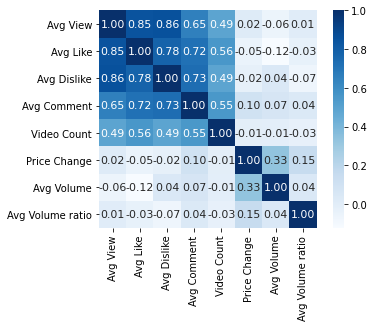

In [18]:
data = youtube1.corr(method = 'pearson')
df_heatmap = sns.heatmap(data, cbar = True, annot = True, annot_kws={'size' :11}, fmt = '.2f', square = True, cmap = 'Blues')

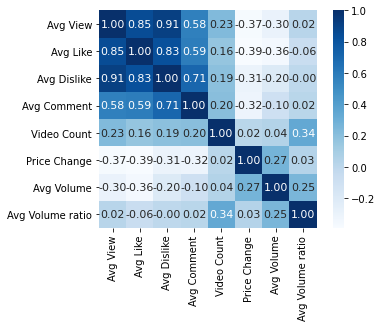

In [19]:
data = youtube2.corr(method = 'pearson')
df_heatmap = sns.heatmap(data, cbar = True, annot = True, annot_kws={'size' :11}, fmt = '.2f', square = True, cmap = 'Blues')

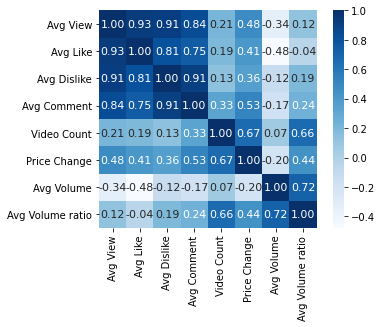

In [20]:
data = youtube3.corr(method = 'pearson')
df_heatmap = sns.heatmap(data, cbar = True, annot = True, annot_kws={'size' :11}, fmt = '.2f', square = True, cmap = 'Blues')

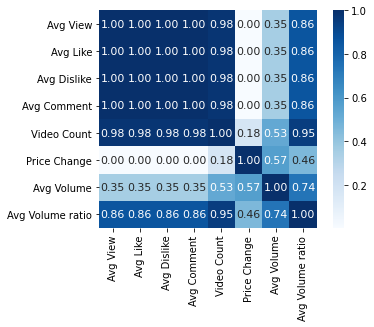

In [21]:
data = youtube4.corr(method = 'pearson')
df_heatmap = sns.heatmap(data, cbar = True, annot = True, annot_kws={'size' :11}, fmt = '.2f', square = True, cmap = 'Blues')